In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import numpy as np
from shapely.geometry import Point


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

#Display all columns instead of "..." truncation
pd.options.display.max_columns = None

#No scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Set plot sizes
plt.rcParams["figure.figsize"] = 10, 10

In [3]:
#Read in taxi data
taxis = pd.read_csv('nyc_taxi.csv')

In [3]:
#Read in geospatial data for New York
ny_state = gpd.read_file('ZillowNeighborhoods-NY.shp')

In [4]:
print(ny_state.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
State       579 non-null object
County      579 non-null object
City        579 non-null object
Name        579 non-null object
RegionID    579 non-null object
geometry    579 non-null object
dtypes: object(6)
memory usage: 13.6+ KB
None


In [5]:
#Locate duplicate regions
ny_state[ny_state['RegionID'].duplicated()]

,State,County,City,Name,RegionID,geometry
246,NY,New York,New York,Marble Hill,270880,POLYGON ((-73.91071526499991 40.87890143900006...
282,NY,Kings,New York,Vinegar Hill,270960,POLYGON ((-73.97901955399993 40.70666396400009...
310,NY,Bronx,New York,Rikers Island,270922,"POLYGON ((-73.8865870059999 40.79891837000008,..."
375,NY,New York,New York,Brooklyn Heights,403122,POLYGON ((-73.99610507599969 40.70422567500025...


In [6]:
#Investigate one of the duplicate regions
ny_state[ny_state['RegionID'] == '270960']

,State,County,City,Name,RegionID,geometry
281,NY,New York,New York,Vinegar Hill,270960,POLYGON ((-73.97901955399993 40.70666396400009...
282,NY,Kings,New York,Vinegar Hill,270960,POLYGON ((-73.97901955399993 40.70666396400009...


In [7]:
#Drop duplicate regions
ny_state = ny_state.loc[ny_state['RegionID'].drop_duplicates().index]

In [8]:
#Check that all regions are unique (output should be 1)
ny_state['RegionID'].nunique(dropna = True) / len(ny_state['RegionID'])

1.0

In [9]:
#Set index to region ID
ny_state['RegionID'] = ny_state['RegionID'].astype('int')
ny_state = ny_state.set_index(['RegionID'])
ny_state = ny_state.sort_index()

In [10]:
#All data come from the same state, drop state column
ny_state = ny_state.drop('State', axis=1)

In [11]:
#Convert columns to categoricals
def convert_to_categorical(df, cols):
    """Locate columns with low number of unique values and convert them to categoricals"""
    for col in cols:
        unique_vals = len(df[col].unique())
        unique_ratio = unique_vals / len(df[col])
        if unique_ratio < 0.2:
            df[col] = df[col].astype('category')
    return df

In [12]:
#List columns of ny_state Dataframe
columns = list(ny_state.select_dtypes(include=['object']).columns.values)
columns.remove('geometry')
print(columns)

['County', 'City', 'Name']


In [13]:
#Convert columns to categoricals
convert_to_categorical(ny_state, columns)

,County,City,Name,geometry
RegionID,,,,
3698,Wyoming,Eagle,Bliss,"POLYGON ((-78.23548 42.603406, -78.235438 42.5..."
3736,Suffolk,Town of Islip,Bohemia,POLYGON ((-73.14422599999978 40.78667100000015...
4083,Rockland,Ramapo,Chestnut Ridge,POLYGON ((-74.05993899999993 41.10123000000004...
4257,Westchester,Yorktown,Crompond,"POLYGON ((-73.82453700000001 41.305756, -73.82..."
4819,Queens,New York,Fresh Meadows,"POLYGON ((-73.7699123773972 40.74150740314482,..."
4982,Suffolk,Huntington,Greenlawn,POLYGON ((-73.35160499999995 40.87515100000007...
5061,Nassau,Great Neck,Harbor Hills,POLYGON ((-73.74329099999994 40.79097000000007...
5397,Nassau,Great Neck,Kensington,POLYGON ((-73.70949799999994 40.79300700000005...
5837,Queens,New York,Maspeth,"POLYGON ((-73.8881191182047 40.73555656190326,..."


In [14]:
print(ny_state.info(verbose=False))

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 575 entries, 3698 to 764316
Columns: 4 entries, County to geometry
dtypes: category(2), object(2)
memory usage: 12.3+ KB
None


In [15]:
ny_state.drop('geometry', axis=1).describe()

,County,City,Name
count,575,575,575
unique,24,50,558
top,Queens,New York,Downtown
freq,70,274,5


In [16]:
nyc = ny_state.loc[ny_state['City'] == 'New York']
nyc.shape

(274, 4)

In [17]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 28 columns):
Unnamed: 0           1458644 non-null int64
pickup_datetime      1458644 non-null object
dropoff_datetime     1458644 non-null object
passenger_count      1458644 non-null int64
pickup_longitude     1458644 non-null float64
pickup_latitude      1458644 non-null float64
dropoff_longitude    1458644 non-null float64
dropoff_latitude     1458644 non-null float64
trip_duration        1458644 non-null int64
date                 1458644 non-null object
station_num          1458644 non-null object
station_name         1458644 non-null object
station_latitude     1458644 non-null float64
station_longitude    1458644 non-null float64
average_wind         1458644 non-null float64
precipitation        1458644 non-null float64
snowfall             1458644 non-null float64
snow_depth           1458644 non-null float64
avg_temp             1458644 non-null float64
max_temp             145

In [5]:
#Remove column that stores duplicate index
taxis = taxis.iloc[:,1:]

In [6]:
#Set index to datetime of pickup
taxis['pickup_datetime'] = pd.to_datetime(taxis['pickup_datetime'])
datetime_ind = list(taxis['pickup_datetime'])
taxis.index = datetime_ind

In [7]:
#While we're at it, pair the datetimes with their respective days of the week
day_of_week = [x.weekday() for x in datetime_ind]
taxis['day_of_week'] = day_of_week

In [8]:
#Create a separate column with the names of the weekdays in case they're needed later
weekday_dict = {0: 'Monday',
               1: 'Tuesday',
               2: 'Wednesday',
               3: 'Thursday',
               4: 'Friday',
               5: 'Saturday',
               6: 'Sunday'}
taxis['weekday_name'] = taxis['day_of_week'].map(weekday_dict)

In [9]:
#Change days of week to categoricals
taxis['day_of_week'] = taxis['day_of_week'].astype('category').cat.as_ordered()
taxis['weekday_name'] = taxis['weekday_name'].astype('category')

In [10]:
#Set drop off to datetime
taxis['dropoff_datetime'] = pd.to_datetime(taxis['dropoff_datetime'])

In [24]:
#Convert taxis dataframe to geodataframe for plotting
geometry = [Point(xy) for xy in zip(taxis['pickup_longitude'], taxis['pickup_latitude'])]
crs = {'init': 'epsg:4269'}
taxis = gpd.GeoDataFrame(taxis, crs=crs, geometry=geometry)

In [25]:
xmin = -74.3
xmax = -73.72
ymin = 40.47
ymax = 40.92

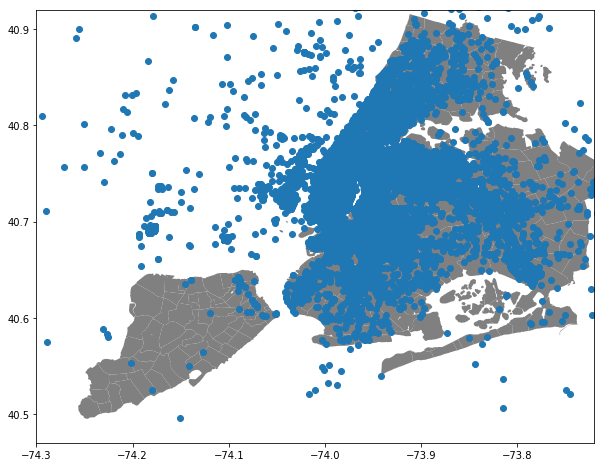

In [26]:
taxis.plot(ax=nyc.plot(facecolor='gray'))
plt.axis([xmin, xmax, ymin, ymax])
plt.show()

We can see that the pickup coordinates may not always be 100% accurate, since some of them appear to be in areas where there is no land. The area directly west of Manhattan and north of Staten Island is where New Jersey would be, so some pickups are being made out there as well.

### Frequency Analysis

In [27]:
taxis_geo = taxis[['trip_duration','geometry']]

In [28]:
nyc_taxi = gpd.sjoin(nyc, taxis_geo, how='inner', op='intersects')


In [29]:
nyc_dict = dict(zip(nyc['Name'], nyc['geometry']))
nyc_count = nyc_taxi[['Name','trip_duration']].groupby('Name').count().reset_index()
nyc_count = gpd.GeoDataFrame(nyc_count, crs={'init': 'epsg:4269'}, geometry=nyc_count['Name'].map(nyc_dict))
nyc_count.columns = ['Name','count','geometry']

In [30]:
nyc_count['log_count'] = np.log(nyc_count['count'])

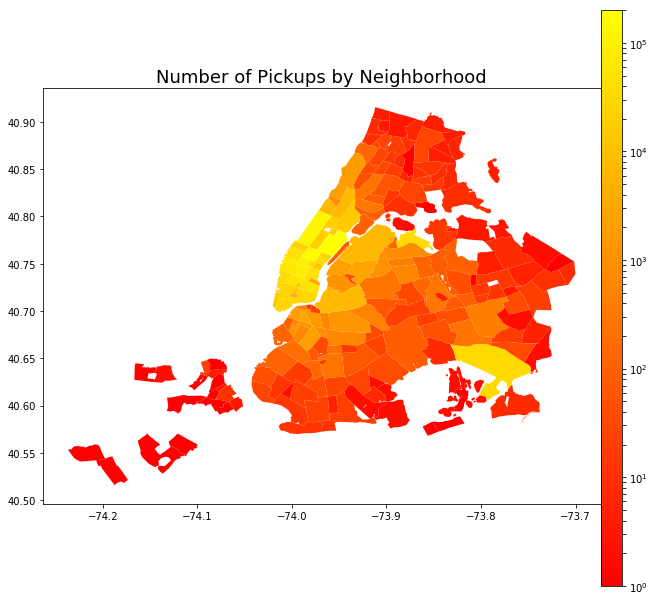

In [31]:
import matplotlib.colors as colors
style='autumn'
vmin, vmax = nyc_count['count'].min(), nyc_count['count'].max()
ax = nyc_count.plot(column='count', cmap=style, norm=colors.LogNorm(vmin=vmin, vmax=vmax))
fig = ax.get_figure()
plt.title('Number of Pickups by Neighborhood', {'fontsize': 18})
cax = fig.add_axes([0.9, 0.1, 0.03, 0.8])
sm = plt.cm.ScalarMappable(cmap=style, norm=colors.LogNorm(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, cax=cax)
plt.show()

The logarithmic-scaled heatmap above displays only neighborhoods that had at least one pickup between 1/1/16 and 6/30/16. In general, we see that most cabs are picking up passengers in Manhattan, with a large number of pickups also occurring at JFK and LaGuardia Airports. Some neighborhoods in North Brooklyn and Western Queens see a moderate number of pickups as well.

### Map Drop Off Locations

### Location of Pickups for Airport Trips

In [32]:
#Take monthly count of data
monthly_count = taxis['pickup_datetime'].resample('M').count()
months = monthly_count.index
month_labels = months.strftime('%b')

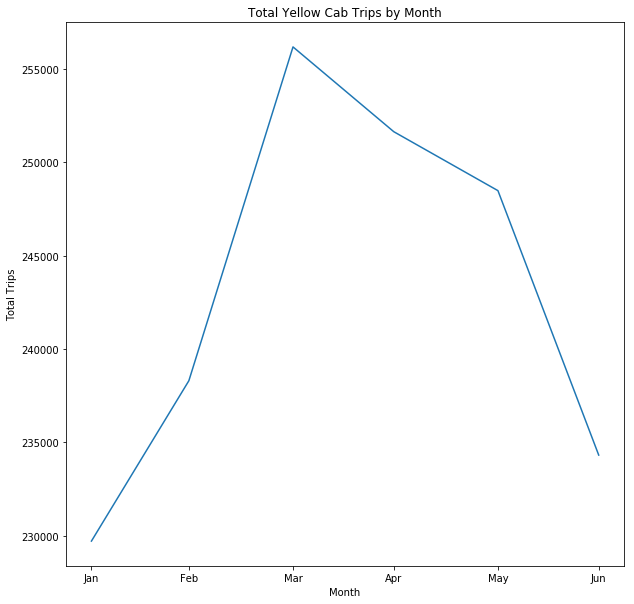

In [33]:
plt.plot(monthly_count)
plt.xticks(months, month_labels)
plt.xlabel('Month')
plt.ylabel('Total Trips')
plt.title('Total Yellow Cab Trips by Month')
plt.show()

The total trip count is lowest in January and highest in March, however this graph isn't very helpful since the number of days in each month varies.

In [34]:
#Take daily count of data
daily_trips = taxis['pickup_datetime'].resample('D').count()
#Rolling 7-day average
smoothed_7d = daily_trips.rolling(window=7).mean()
#Rolling 30-day average
smoothed_30d = daily_trips.rolling(window=30).mean()

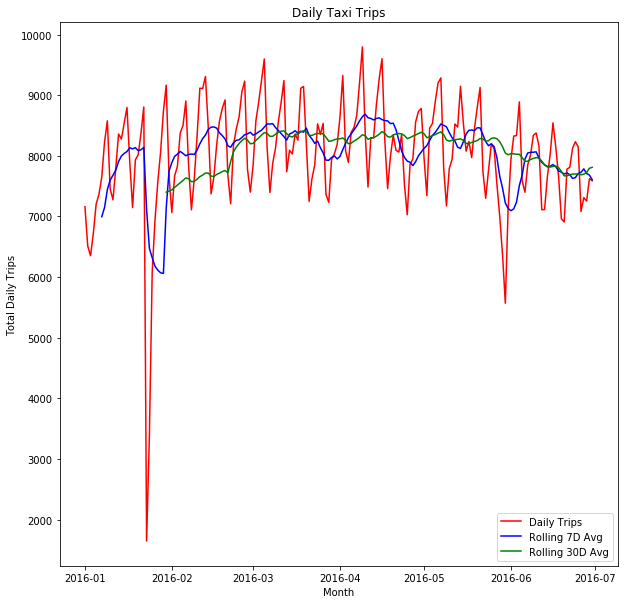

In [35]:
plot1, = plt.plot(daily_trips, color='red')
plot2, = plt.plot(smoothed_7d, color='blue')
plot3, = plt.plot(smoothed_30d, color='green')
plt.xlabel('Month')
plt.ylabel('Total Daily Trips')
plt.title('Daily Taxi Trips')
plt.legend([plot1, plot2, plot3], ['Daily Trips','Rolling 7D Avg','Rolling 30D Avg'], loc='lower right')
plt.show()

Looking at the 30-day rolling average, it appears that demand for taxis is pretty steady but is slightly higher in March and April. The daily trip count shows us that the number of trips sees peaks and valleys on a weekly basis, most likely peaking on Friday or Saturday. Also, we see that taxi demand was unusually low one day in January and one day in late May. These outliers are investigated below.

In [36]:
#Find outlier in January
daily_trips.loc['2016-01']

index_right
2016-01-01    7162
2016-01-02    6512
2016-01-03    6353
2016-01-04    6725
2016-01-05    7204
2016-01-06    7365
2016-01-07    7649
2016-01-08    8229
2016-01-09    8578
2016-01-10    7454
2016-01-11    7276
2016-01-12    7794
2016-01-13    8360
2016-01-14    8277
2016-01-15    8539
2016-01-16    8797
2016-01-17    7891
2016-01-18    7146
2016-01-19    7934
2016-01-20    8018
2016-01-21    8375
2016-01-22    8805
2016-01-23    1648
2016-01-24    3383
2016-01-25    6084
2016-01-26    6941
2016-01-27    7571
2016-01-28    8066
2016-01-29    8735
2016-01-30    9166
2016-01-31    7670
Freq: D, Name: pickup_datetime, dtype: int64

In [37]:
#Check weather for January 23rd
taxis.loc['2016-01-23'].iloc[:,-18:].head()

,station_longitude,average_wind,precipitation,snowfall,snow_depth,avg_temp,max_temp,min_temp,fog,fog_heavy,thunder,ice_pellets,glaze,smoke_haze,blowing_snow,day_of_week,weekday_name,geometry
index_right,,,,,,,,,,,,,,,,,,
2016-01-23 08:46:42,-73.880,24.160,2.400,27.900,7.000,28.000,28.000,25.000,True,True,False,False,False,False,True,5,Saturday,POINT (-73.96953582763672 40.75521850585938)
2016-01-23 00:06:25,-73.880,24.160,2.400,27.900,7.000,28.000,28.000,25.000,True,True,False,False,False,False,True,5,Saturday,POINT (-73.9821014404297 40.74590301513672)
2016-01-23 10:38:43,-73.880,24.160,2.400,27.900,7.000,28.000,28.000,25.000,True,True,False,False,False,False,True,5,Saturday,POINT (-73.97528076171875 40.76099014282227)
2016-01-23 01:16:58,-73.880,24.160,2.400,27.900,7.000,28.000,28.000,25.000,True,True,False,False,False,False,True,5,Saturday,POINT (-74.00491333007811 40.72830963134766)
2016-01-23 00:19:01,-73.880,24.160,2.400,27.900,7.000,28.000,28.000,25.000,True,True,False,False,False,False,True,5,Saturday,POINT (-73.99310302734375 40.69293975830078)


A large snow storm on January 23rd caused many people to stay inside. Additionally, it was a Saturday which meant fewer people were obligated to go anywhere.

In [38]:
#Find outlier in late May
daily_trips.loc['2016-05']

index_right
2016-05-01    7964
2016-05-02    7344
2016-05-03    8457
2016-05-04    8535
2016-05-05    8896
2016-05-06    9202
2016-05-07    9285
2016-05-08    7801
2016-05-09    7174
2016-05-10    7789
2016-05-11    7941
2016-05-12    8524
2016-05-13    8476
2016-05-14    9147
2016-05-15    8547
2016-05-16    8077
2016-05-17    8237
2016-05-18    7971
2016-05-19    8455
2016-05-20    8808
2016-05-21    9127
2016-05-22    7745
2016-05-23    7300
2016-05-24    7762
2016-05-25    8195
2016-05-26    8121
2016-05-27    7530
2016-05-28    7004
2016-05-29    6372
2016-05-30    5570
2016-05-31    7131
Freq: D, Name: pickup_datetime, dtype: int64

In [39]:
#Weather on May 30
taxis.loc['2016-05-30'].head()

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,date,station_num,station_name,station_latitude,station_longitude,average_wind,precipitation,snowfall,snow_depth,avg_temp,max_temp,min_temp,fog,fog_heavy,thunder,ice_pellets,glaze,smoke_haze,blowing_snow,day_of_week,weekday_name,geometry
index_right,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-30 13:33:07,2016-05-30 13:33:07,2016-05-30 13:41:03,2,-74.001,40.718,-73.996,40.691,476,2016-05-30,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,7.610,1.530,0.000,0.000,74.000,82.000,69.000,True,False,False,False,False,False,False,0,Monday,POINT (-74.00074768066406 40.71828079223633)
2016-05-30 13:08:31,2016-05-30 13:08:31,2016-05-30 13:15:25,2,-74.005,40.719,-74.015,40.714,414,2016-05-30,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,7.610,1.530,0.000,0.000,74.000,82.000,69.000,True,False,False,False,False,False,False,0,Monday,POINT (-74.00528717041014 40.71915817260742)
2016-05-30 12:13:20,2016-05-30 12:13:20,2016-05-30 12:31:27,2,-73.871,40.774,-73.929,40.851,1087,2016-05-30,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,7.610,1.530,0.000,0.000,74.000,82.000,69.000,True,False,False,False,False,False,False,0,Monday,POINT (-73.87088012695313 40.77373886108398)
2016-05-30 04:01:54,2016-05-30 04:01:54,2016-05-30 04:16:24,5,-73.993,40.722,-73.999,40.673,870,2016-05-30,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,7.610,1.530,0.000,0.000,74.000,82.000,69.000,True,False,False,False,False,False,False,0,Monday,POINT (-73.99329376220702 40.72245025634766)
2016-05-30 23:02:53,2016-05-30 23:02:53,2016-05-30 23:31:42,2,-73.777,40.645,-73.917,40.701,1729,2016-05-30,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,7.610,1.530,0.000,0.000,74.000,82.000,69.000,True,False,False,False,False,False,False,0,Monday,POINT (-73.77671813964845 40.64510726928711)


May 30, 2016 was a Monday which is somewhat unexpected given that taxi demand is usually pretty steady on business days. There was some precipitation and fog, but the temperature was pretty warm. However, a quick Google search reveals that May 30, 2016 was Memorial Day! This is a widely observed federal holiday in the U.S. that occurs on the last Monday in May, so not many people work on that day.

In [40]:
weekday = [x.weekday() for x in list(daily_trips.index)]
trips_by_weekday = pd.DataFrame({'weekday': weekday, 'trip_count': list(daily_trips)})

In [41]:
trips_by_weekday.groupby('weekday').describe()

trip_count                                                        \
             count     mean      std      min      25%      50%      75%   
weekday                                                                    
0           26.000 7208.385  516.406 5570.000 7111.000 7262.000 7398.000   
1           26.000 7798.038  372.522 6941.000 7648.000 7816.500 7978.250   
2           26.000 8082.154  305.647 7365.000 7941.500 8027.500 8333.500   
3           26.000 8406.692  354.070 7588.000 8205.000 8416.000 8568.500   
4           26.000 8597.423  519.947 7162.000 8339.500 8686.000 9012.000   
5           26.000 8494.923 1594.600 1648.000 8397.750 8913.000 9238.750   
6           26.000 7514.077 1012.193 3383.000 7386.500 7741.500 8054.000   

                  
             max  
weekday           
0       8091.000  
1       8457.000  
2       8578.000  
3       9116.000  
4       9276.000  
5       9796.000  
6       8547.000

In [42]:
trips_by_weekday.head()

,trip_count,weekday
0,7162,4
1,6512,5
2,6353,6
3,6725,0
4,7204,1


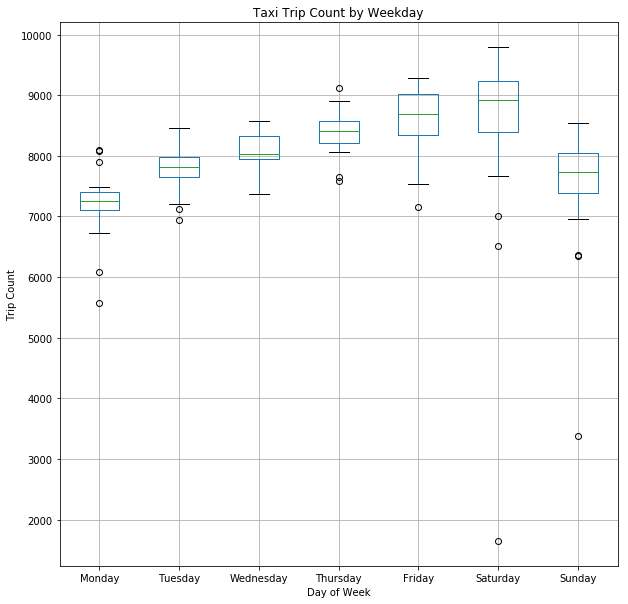

In [43]:
#Boxplot of taxi trips by weekday
trips_by_weekday.pivot(columns='weekday').boxplot()
plt.xlabel('Day of Week')
plt.ylabel('Trip Count')
plt.title('Taxi Trip Count by Weekday')
plt.xticks(np.arange(1,8),('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'))
plt.show()

The demand for taxis gradually increases throughout the week, peaking on Saturday and then dropping significantly on Sunday. The spread of trip counts also appears to increase as the week progresses as the IQR of trip counts is much larger for Friday, Saturday and Sunday.

In [44]:
#Create column indicating weather the day of the week is Mon-Fri
taxis['weekday_type'] = taxis['day_of_week'] <= 4

In [45]:
#Filter down to weekdays and run hourly analysis
hourly_trips = taxis.loc[taxis['weekday_type'] == True, 'pickup_datetime'].resample('H').count()

In [46]:
#Filter weekend dates out of index
hourly_trips = hourly_trips.loc[hourly_trips > 0]

In [47]:
#Create list extracting hours from datetime index
hours = []
for idx, trip in hourly_trips.items():
    hours.append(str(idx)[-8:])

In [48]:
#Create new dataframe with hours and trip count
hourly_trips_df = pd.DataFrame({'hours':hours, 'weekday':list(hourly_trips)})
hourly_summary = hourly_trips_df.groupby(hours).mean()

In [49]:
hourly_trips_weekend = taxis.loc[taxis['weekday_type'] == False, 'pickup_datetime'].resample('H').count()
hourly_trips_weekend = hourly_trips_weekend.loc[hourly_trips_weekend > 0]
hours = []
for idx, trip in hourly_trips_weekend.items():
    hours.append(str(idx)[-8:])
hourly_trips_df2 = pd.DataFrame({'hours':hours, 'weekend':list(hourly_trips_weekend)})
hourly_summary2 = hourly_trips_df2.groupby(hours).mean()

In [50]:
hourly_summary2.head()

,weekend
00:00:00,471.333
01:00:00,408.804
02:00:00,329.843
03:00:00,253.000
04:00:00,160.558


In [51]:
hourly_summary = pd.concat([hourly_summary, hourly_summary2], axis=1)

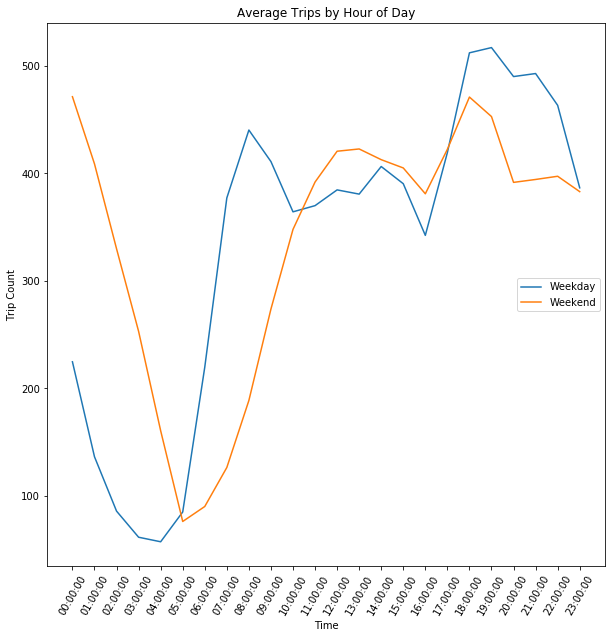

In [52]:
line1, line2, = plt.plot(hourly_summary)
plt.xticks(rotation=60)
plt.xlabel('Time')
plt.ylabel('Trip Count')
plt.title('Average Trips by Hour of Day')
plt.legend((line1, line2), ['Weekday','Weekend'],loc='center right')
plt.show()

On weekdays, the demand for taxis fluctuates quite a bit, hitting peaks around 8-9am and 7-8pm. It is common for people to take taxis to and from work, which explains the morning and afternoon peaks. Additionally, people frequently use taxis during the 2-3 hours immediately after work for various purposes such as work-related events, happy hours, sporting events or simply socializing with friends and family. The total count of trips bottoms out from 3-4am since hardly anyone is out and about during those hours. During the afternoon, there is a moderate dip in demand between 4 and 5pm as cab drivers tend to change shifts during that hour.

On weekends, demand for taxis is highest at midnight and then declines drastically until 5am, at which point it begins to increase, hitting peaks in the early afternoon and again around 7pm.

### Trip Duration

In [11]:
taxis['trip_minutes'] = taxis['trip_duration'].apply(lambda x: x/60)

In [12]:
taxis['trip_minutes'].describe()

count   1458644.000
mean         15.992
std          87.291
min           0.017
25%           6.617
50%          11.033
75%          17.917
max       58771.367
Name: trip_minutes, dtype: float64

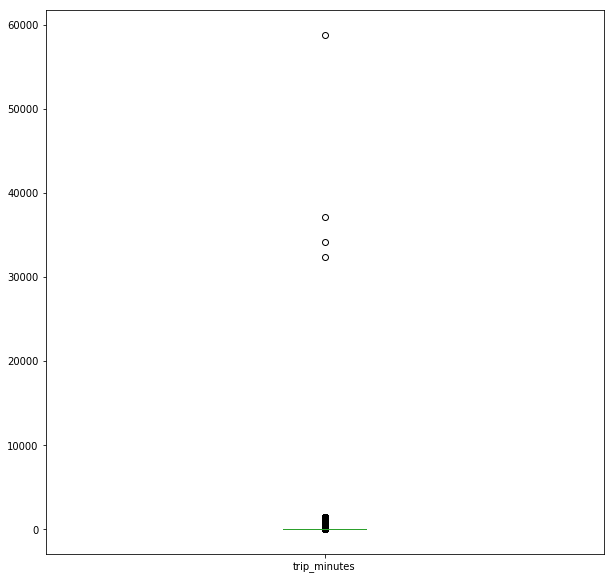

In [62]:
#Plot trip duration in minutes
taxis['trip_minutes'].plot(kind='box')
plt.show()

Trip duration has a few extremely high values that don't seem realistic. A 30,000 minute-long trip is equivalent to 500 hours or almost 21 days.

In [21]:
taxis = taxis.loc[taxis['trip_minutes'] < 30000]

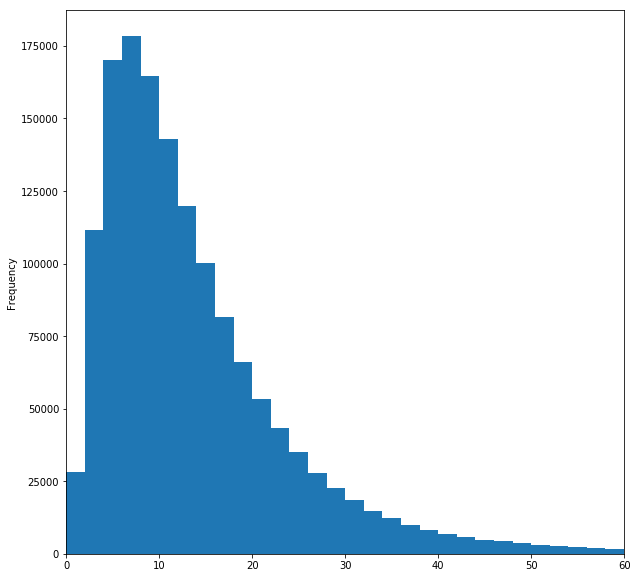

In [20]:
#Trip duration histogram
taxis.loc[taxis['trip_minutes'] <= 60, 'trip_minutes'].plot(kind='hist', bins=30)
plt.xlim((0,60))
plt.show()

In [13]:
taxis['month'] = taxis['pickup_datetime'].apply(lambda x: x.month)

In [14]:
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June'}
taxis['month'] = taxis['month'].astype('category').cat.as_ordered()
taxis['month'] = taxis['month'].map(month_dict)

In [22]:
taxis.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1458640 entries, 2016-03-14 17:24:55 to 2016-04-05 14:44:25
Columns: 31 entries, pickup_datetime to month
dtypes: bool(7), category(2), datetime64[ns](2), float64(14), int64(2), object(4)
memory usage: 246.2+ MB


In [36]:
taxis.head()

,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,date,station_num,station_name,station_latitude,station_longitude,average_wind,precipitation,snowfall,snow_depth,avg_temp,max_temp,min_temp,fog,fog_heavy,thunder,ice_pellets,glaze,smoke_haze,blowing_snow,day_of_week,weekday_name,trip_minutes,month
2016-03-14 17:24:55,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,455,2016-03-14,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,17.670,0.180,0.000,0.000,48.000,52.000,41.000,True,False,False,False,False,True,False,0,Monday,7.583,March
2016-06-12 00:43:35,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,663,2016-06-12,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,19.910,0.000,0.000,0.000,80.000,86.000,63.000,False,False,False,False,False,False,False,6,Sunday,11.050,June
2016-01-19 11:35:24,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,2124,2016-01-19,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,21.250,0.000,0.000,0.000,23.000,30.000,18.000,False,False,False,False,False,False,False,1,Tuesday,35.400,January
2016-04-06 19:32:31,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,429,2016-04-06,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,11.410,0.000,0.000,0.000,39.000,48.000,32.000,False,False,False,False,False,False,False,2,Wednesday,7.150,April
2016-03-26 13:30:55,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,435,2016-03-26,USW00014732,"LA GUARDIA AIRPORT, NY US",40.779,-73.880,10.070,0.000,0.000,0.000,47.000,51.000,39.000,False,False,False,False,False,False,False,5,Saturday,7.250,March


In [ ]:
print('hello world')

What effect does weather have on trip duration?

### Passenger Count

In [55]:
#Passenger count overall

In [56]:
#Passenger count on weekdays vs. weekends

### Weather (Impact on Taxi Trip Count, Trip Duration)